In [62]:
print("Hello World")

Hello World


In [63]:
import numpy as np
import pandas as pd

In [64]:
df = pd.read_csv('F:\\Coding\\R\\Model_Survival\\Data_Project_Modsur3.csv', low_memory=False)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [66]:
df.describe(include='all')

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
count,1904.000000,1904.000000,1882,1904,1889,1850,1904.000000,1904,1904.000000,1874,...,1904,1904,1904,1904,1904,1904,1904,1904,1904,1904
unique,NaN,NaN,2,2,6,3,NaN,7,NaN,2,...,5,5,5,4,4,3,3,3,3,2
top,NaN,NaN,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NaN,LumA,NaN,Positve,...,0,0,0,0,0,0,0,0,0,0
freq,NaN,NaN,1127,1903,1500,939,NaN,679,NaN,1445,...,1900,1900,1900,1901,1901,1902,1902,1902,1902,1903
mean,3921.982143,61.087054,NaN,NaN,NaN,NaN,0.207983,NaN,2.643908,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2358.478332,12.978711,NaN,NaN,NaN,NaN,0.405971,NaN,1.228615,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,21.930000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,896.500000,51.375000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4730.500000,61.770000,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5536.250000,70.592500,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df.isna().sum()

patient_id                 0
age_at_diagnosis           0
type_of_breast_surgery    22
cancer_type                0
cancer_type_detailed      15
                          ..
hras_mut                   0
prps2_mut                  0
smarcb1_mut                0
stmn2_mut                  0
siah1_mut                  0
Length: 693, dtype: int64

In [68]:
kolom = df.columns
for col in kolom:
    print(col)

patient_id
age_at_diagnosis
type_of_breast_surgery
cancer_type
cancer_type_detailed
cellularity
chemotherapy
pam50_+_claudin-low_subtype
cohort
er_status_measured_by_ihc
er_status
neoplasm_histologic_grade
her2_status_measured_by_snp6
her2_status
tumor_other_histologic_subtype
hormone_therapy
inferred_menopausal_state
integrative_cluster
primary_tumor_laterality
lymph_nodes_examined_positive
mutation_count
nottingham_prognostic_index
oncotree_code
overall_survival_months
overall_survival
pr_status
radio_therapy
3-gene_classifier_subtype
tumor_size
tumor_stage
death_from_cancer
brca1
brca2
palb2
pten
tp53
atm
cdh1
chek2
nbn
nf1
stk11
bard1
mlh1
msh2
msh6
pms2
epcam
rad51c
rad51d
rad50
rb1
rbl1
rbl2
ccna1
ccnb1
cdk1
ccne1
cdk2
cdc25a
ccnd1
cdk4
cdk6
ccnd2
cdkn2a
cdkn2b
myc
cdkn1a
cdkn1b
e2f1
e2f2
e2f3
e2f4
e2f5
e2f6
e2f7
e2f8
src
jak1
jak2
stat1
stat2
stat3
stat5a
stat5b
mdm2
tp53bp1
adam10
adam17
aph1a
aph1b
arrdc1
cir1
ctbp1
ctbp2
cul1
dll1
dll3
dll4
dtx1
dtx2
dtx3
dtx4
ep300
fbxw7
hda

# Informasi

fitur utama yang perlu adalah *overall_survival*(hidup atau meninggal), *overall_survival_months*(waktu hingga meninggal), *death_from_cancer*(sensor individu meninggalkan penelitian)

In [69]:
filter = df[['patient_id',
            'age_at_diagnosis',
            'type_of_breast_surgery',
            'cancer_type',
            'cancer_type_detailed',
            'cellularity',
            'chemotherapy',
            'pam50_+_claudin-low_subtype',
            'cohort',
            'er_status_measured_by_ihc',
            'er_status',
            'neoplasm_histologic_grade',
            'her2_status_measured_by_snp6',
            'her2_status',
            'tumor_other_histologic_subtype',
            'hormone_therapy',
            'inferred_menopausal_state',
            'integrative_cluster',
            'primary_tumor_laterality',
            'lymph_nodes_examined_positive',
            'mutation_count',
            'nottingham_prognostic_index',
            'oncotree_code',
            'overall_survival_months',
            'overall_survival',
            'pr_status',
            'radio_therapy',
            '3-gene_classifier_subtype',
            'tumor_size',
            'tumor_stage',
            'death_from_cancer']]

In [70]:
filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [71]:
filter.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092 entries, 1 to 1664
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1092 non-null   int64  
 1   age_at_diagnosis                1092 non-null   float64
 2   type_of_breast_surgery          1092 non-null   object 
 3   cancer_type                     1092 non-null   object 
 4   cancer_type_detailed            1092 non-null   object 
 5   cellularity                     1092 non-null   object 
 6   chemotherapy                    1092 non-null   int64  
 7   pam50_+_claudin-low_subtype     1092 non-null   object 
 8   cohort                          1092 non-null   float64
 9   er_status_measured_by_ihc       1092 non-null   object 
 10  er_status                       1092 non-null   object 
 11  neoplasm_histologic_grade       1092 non-null   float64
 12  her2_status_measured_by_snp6    1092 no

In [72]:
unique_columns = df.columns.difference(filter.columns)

gene_data = df[unique_columns]

gene_data.head()

,abcb1,abcb11,abcc1,abcc10,ackr3,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,...,usp9x_mut,utrn,utrn_mut,vegfa,vegfb,wfdc2,wwox,zfp36l1,zfp36l1_mut,zfyve9
0,1.6758,-0.4071,-1.0213,-0.1948,1.9395,0.4710,-0.9114,1.8079,-0.9273,-0.7363,...,0,1.6410,0,-1.1656,1.4530,-0.0897,-0.4464,0.3492,0,0.7291
1,-1.1793,-0.0931,0.4261,-0.9788,1.4264,0.8386,0.6737,0.7279,1.0905,0.5358,...,0,0.1828,0,-0.4946,1.6321,0.9657,-0.8286,1.4963,0,-0.3056
2,-0.4457,-1.1208,-0.5168,-1.5536,1.1780,2.2031,-1.7817,0.6777,1.5452,-0.5908,...,0,-0.5732,0,-1.0330,-1.0909,0.8227,-0.3171,2.8160,0,0.0015
3,-0.8191,-0.7736,-1.4145,-0.9771,2.4700,1.0455,-1.2848,-0.4277,2.9200,0.5155,...,0,-0.1134,0,-1.1922,-0.9584,-0.5884,-0.4584,2.0714,0,-1.5983
4,-0.3463,0.7826,-0.8794,0.0819,1.3426,-0.7534,0.6626,0.2038,0.4134,-0.0238,...,0,-0.7561,0,0.6806,2.0137,-0.6005,0.1638,-0.0912,0,1.3898


In [73]:
len(gene_data.columns.unique())

662

# Clustering Gene (Non-Mutations)

In [75]:
# Ambil hanya kolom ekspresi gen (drop kolom mutasi)
gene_expr_cols = [col for col in gene_data.columns if not col.endswith('_mut')]
gene_expr = gene_data[gene_expr_cols]
gene_expr.head()

,abcb1,abcb11,abcc1,abcc10,ackr3,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,...,ugt2b7,ush2a,usp9x,utrn,vegfa,vegfb,wfdc2,wwox,zfp36l1,zfyve9
0,1.6758,-0.4071,-1.0213,-0.1948,1.9395,0.4710,-0.9114,1.8079,-0.9273,-0.7363,...,-0.3354,0.9776,-0.0678,1.6410,-1.1656,1.4530,-0.0897,-0.4464,0.3492,0.7291
1,-1.1793,-0.0931,0.4261,-0.9788,1.4264,0.8386,0.6737,0.7279,1.0905,0.5358,...,-0.8920,-0.7401,0.3202,0.1828,-0.4946,1.6321,0.9657,-0.8286,1.4963,-0.3056
2,-0.4457,-1.1208,-0.5168,-1.5536,1.1780,2.2031,-1.7817,0.6777,1.5452,-0.5908,...,0.3655,0.8019,0.0390,-0.5732,-1.0330,-1.0909,0.8227,-0.3171,2.8160,0.0015
3,-0.8191,-0.7736,-1.4145,-0.9771,2.4700,1.0455,-1.2848,-0.4277,2.9200,0.5155,...,-0.4828,0.1163,0.3602,-0.1134,-1.1922,-0.9584,-0.5884,-0.4584,2.0714,-1.5983
4,-0.3463,0.7826,-0.8794,0.0819,1.3426,-0.7534,0.6626,0.2038,0.4134,-0.0238,...,1.3223,-0.5005,0.6024,-0.7561,0.6806,2.0137,-0.6005,0.1638,-0.0912,1.3898


In [76]:
gene_expr.describe()

,abcb1,abcb11,abcc1,abcc10,ackr3,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,...,ugt2b7,ush2a,usp9x,utrn,vegfa,vegfb,wfdc2,wwox,zfp36l1,zfyve9
count,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03
mean,7.352941e-07,-9.453782e-07,-5.252101e-08,0.000002,-6.302521e-07,5.777311e-07,-5.252101e-07,-6.827731e-07,1.492737e-17,-3.151261e-07,...,3.731842e-18,2.626050e-07,7.352941e-07,3.151261e-07,5.252101e-07,-6.302521e-07,0.000002,5.777311e-07,-4.726891e-07,1.050420e-07
std,1.000262e+00,1.000263e+00,1.000263e+00,1.000263,1.000263e+00,1.000263e+00,1.000264e+00,1.000262e+00,1.000264e+00,1.000263e+00,...,1.000262e+00,1.000262e+00,1.000262e+00,1.000264e+00,1.000263e+00,1.000264e+00,1.000264,1.000263e+00,1.000263e+00,1.000263e+00
min,-1.947700e+00,-3.558200e+00,-2.401000e+00,-2.766800,-2.542700e+00,-3.637700e+00,-5.416500e+00,-3.257400e+00,-2.820500e+00,-2.621000e+00,...,-1.051600e+00,-3.376300e+00,-5.337000e+00,-2.962300e+00,-1.934400e+00,-4.890300e+00,-1.981600,-1.738500e+00,-3.210900e+00,-3.292000e+00
25%,-7.236750e-01,-6.286750e-01,-6.486500e-01,-0.663950,-6.958250e-01,-6.332000e-01,-5.551500e-01,-6.606250e-01,-6.911000e-01,-6.344250e-01,...,-7.260000e-01,-6.237250e-01,-5.714000e-01,-6.799500e-01,-6.937500e-01,-6.320000e-01,-0.684600,-6.400250e-01,-6.781000e-01,-6.871750e-01
50%,-1.703000e-01,-5.050000e-02,-7.965000e-02,-0.116650,-9.865000e-02,5.370000e-02,4.920000e-02,-4.520000e-02,-1.116000e-01,-1.342500e-01,...,-4.248000e-01,-5.000000e-03,-1.420000e-02,-8.495000e-02,-1.639000e-01,6.770000e-02,-0.206550,-2.693500e-01,2.820000e-02,-7.700000e-03
75%,5.459500e-01,5.886500e-01,5.417750e-01,0.509700,5.633000e-01,6.615500e-01,6.696250e-01,5.924000e-01,5.902500e-01,4.459750e-01,...,4.284000e-01,5.689000e-01,6.101250e-01,6.494000e-01,5.131250e-01,6.757000e-01,0.483975,2.789000e-01,6.956000e-01,6.151250e-01
max,5.118000e+00,5.412300e+00,5.347300e+00,5.684900,4.572300e+00,4.894200e+00,3.708100e+00,8.701400e+00,5.323000e+00,6.428800e+00,...,3.284400e+00,1.530110e+01,4.417200e+00,4.131700e+00,5.131900e+00,4.790000e+00,6.526300,5.636800e+00,2.816000e+00,3.989000e+00


In [77]:
from sklearn.preprocessing import StandardScaler

In [79]:
ds = gene_expr.copy()

scaler = StandardScaler()
scaler.fit(ds)

scaled_ds = pd.DataFrame(scaler.transform(ds), columns = ds.columns)

In [80]:
scaled_ds

,abcb1,abcb11,abcc1,abcc10,ackr3,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,...,ugt2b7,ush2a,usp9x,utrn,vegfa,vegfb,wfdc2,wwox,zfp36l1,zfyve9
0,1.675800,-0.407099,-1.0213,-0.194802,1.939499,0.470999,-0.911399,1.807903,-0.927299,-0.7363,...,-0.335400,0.9776,-0.067801,1.640998,-1.165600,1.452999,-0.089701,-0.446400,0.349200,0.7291
1,-1.179301,-0.093099,0.4261,-0.978802,1.426400,0.838599,0.673700,0.727901,1.090499,0.5358,...,-0.892001,-0.7401,0.320199,0.182800,-0.494600,1.632099,0.965698,-0.828600,1.496300,-0.3056
2,-0.445701,-1.120799,-0.5168,-1.553602,1.178000,2.203099,-1.781698,0.677701,1.545199,-0.5908,...,0.365500,0.8019,0.038999,-0.573200,-1.033000,-1.090898,0.822698,-0.317100,2.815999,0.0015
3,-0.819101,-0.773599,-1.4145,-0.977102,2.469999,1.045499,-1.284798,-0.427700,2.919997,0.5155,...,-0.482800,0.1163,0.360199,-0.113400,-1.192200,-0.958398,-0.588401,-0.458400,2.071400,-1.5983
4,-0.346301,0.782601,-0.8794,0.081898,1.342600,-0.753400,0.662600,0.203801,0.413400,-0.0238,...,1.322301,-0.5005,0.602399,-0.756100,0.680599,2.013698,-0.600501,0.163799,-0.091199,1.3898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,-0.551601,-0.179899,-0.8873,-0.951202,0.816400,1.272099,-1.444198,0.131501,0.699699,-0.4224,...,-0.554000,-0.4640,-0.109901,-0.208200,-0.948300,0.088401,-0.973901,-0.812300,0.375000,0.2740
1900,-0.670701,0.456601,0.1139,-0.913402,-0.211199,-0.164701,0.555100,-0.219500,-1.164199,0.0083,...,-0.886301,0.4606,0.697799,-0.910700,-0.895000,-0.487099,-0.125001,-0.320900,-0.115899,0.5597
1901,-0.291701,-0.576899,-0.6231,-0.539302,1.023200,-0.286800,1.034300,-0.598900,0.531500,0.1196,...,-0.626400,-0.5130,-0.616401,-1.376499,-0.770300,-0.739498,-0.640901,-0.546700,0.117200,-0.1953
1902,0.611600,-1.080899,-0.9997,0.009198,-1.009199,-0.420700,0.231000,-1.646501,-0.386300,-0.8965,...,-0.804100,-1.0305,1.014600,-0.087700,-0.805600,-0.120899,-0.457901,-0.788900,-0.212099,1.1007


## Menentukan reduksi dimensi optimal

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca = PCA()
pca_result = pca.fit_transform(scaled_ds)

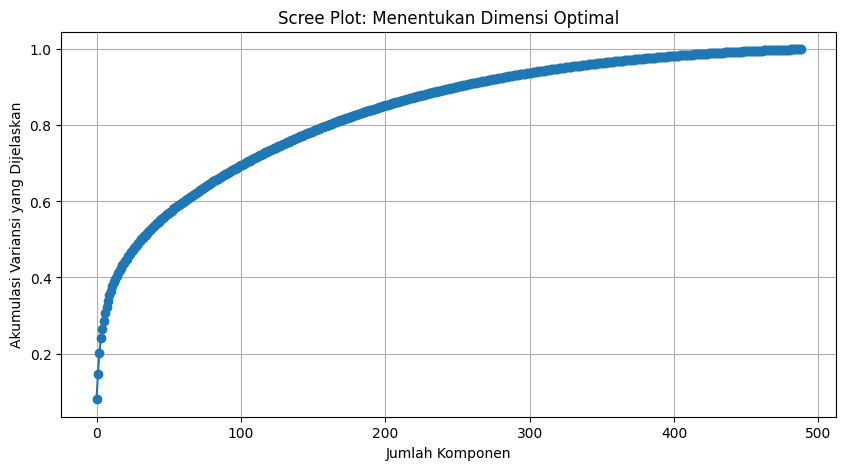

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Plot total variansi yang dijelaskan tiap komponen
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Akumulasi Variansi yang Dijelaskan')
plt.title('Scree Plot: Menentukan Dimensi Optimal')
plt.grid(True)
plt.show()

In [85]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cum_var >= 0.90) + 1
print(f'Jumlah dimensi optimal (≥90% variansi): {n_components_90}')

Jumlah dimensi optimal (≥90% variansi): 249


In [86]:
pca_optimal = PCA(n_components=n_components_90)
reduced_data = pca_optimal.fit_transform(scaled_ds)

# Jika ingin ke DataFrame
gene_expr_reduced = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components_90)])

In [87]:
gene_expr_reduced.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC240,PC241,PC242,PC243,PC244,PC245,PC246,PC247,PC248,PC249
0,10.533945,-4.087880,11.387812,0.154445,-9.823816,-6.693941,4.166366,-2.483776,-4.740355,5.346421,...,0.754161,0.095059,0.545005,-0.173314,1.125296,-0.377108,-0.367100,-0.073241,0.185703,0.786222
1,1.942492,-3.482538,-5.445905,2.019010,1.652827,0.882294,-0.762182,-0.906357,-0.801031,3.779431,...,-0.051891,1.319572,0.258871,0.984605,-0.122059,0.175185,-1.135862,-0.346003,-0.641797,-0.077512
2,15.432223,0.134213,-6.029177,11.513846,4.836876,2.832699,0.399008,2.919772,-0.988427,-0.457768,...,0.973879,0.255718,0.138075,-0.041867,1.082254,-0.000015,0.317840,-0.597994,0.792567,-0.358738
3,12.234126,2.768999,-7.537100,15.477792,3.592760,-0.154850,1.717899,-3.986715,2.693640,1.773783,...,0.792838,-0.919643,-0.018190,-0.727603,1.632821,-0.161838,1.480185,-0.526785,0.044189,-0.405659
4,3.881098,3.104257,-7.540823,-2.839975,0.611349,-4.971570,-4.555812,-1.124574,1.457885,4.935640,...,0.562132,-0.439134,0.793953,0.205535,0.214518,-0.697784,-0.725216,-0.931334,0.444982,-1.031481


In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

k = 2, Davies-Bouldin Index Score = 3.7466
k = 3, Davies-Bouldin Index Score = 3.5460
k = 4, Davies-Bouldin Index Score = 3.3413
k = 5, Davies-Bouldin Index Score = 3.4982
k = 6, Davies-Bouldin Index Score = 3.5488
k = 7, Davies-Bouldin Index Score = 3.5283
k = 8, Davies-Bouldin Index Score = 3.6518
k = 9, Davies-Bouldin Index Score = 3.6186
k = 10, Davies-Bouldin Index Score = 3.3570
k = 11, Davies-Bouldin Index Score = 3.4678
k = 12, Davies-Bouldin Index Score = 3.4356
k = 13, Davies-Bouldin Index Score = 3.5296
k = 14, Davies-Bouldin Index Score = 3.5813


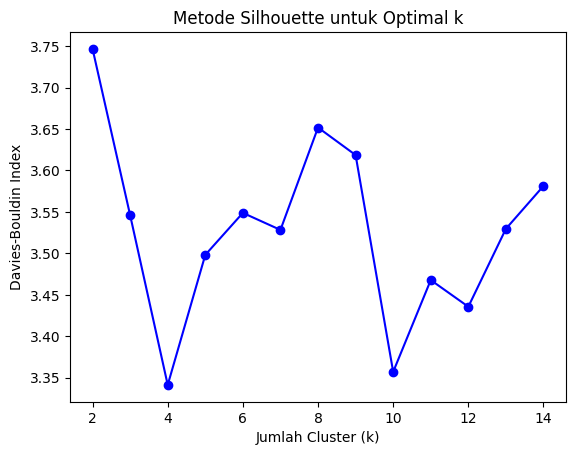

In [94]:
range_cluster = range(2, 15)
sill_scores = []

for k in range_cluster:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(gene_expr_reduced)
    score = davies_bouldin_score(gene_expr_reduced, cluster_labels)
    sill_scores.append(score)
    print(f"k = {k}, Davies-Bouldin Index Score = {score:.4f}")

# Plot hasil

plt.plot(range_cluster, sill_scores, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Metode Silhouette untuk Optimal k')
plt.show()

Dipilih 4 cluster

In [97]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
gene_cluster = kmeans.fit_predict(gene_expr_reduced)

In [98]:
gene_cluster

array([2, 0, 2, ..., 0, 0, 2])

In [99]:
df['Gene Clustered'] = gene_cluster

In [102]:
df['Gene Clustered'].unique()

array([2, 0, 1, 3])

# Gene Mutation Cluster

In [112]:
# Ambil hanya kolom ekspresi gen (drop kolom mutasi)
gene_mut_col = [col for col in gene_data.columns if col.endswith('_mut')]
gene_mut = gene_data[gene_mut_col]
gene_mut.head()

,acvrl1_mut,adgra2_mut,afdn_mut,aff2_mut,agmo_mut,agtr2_mut,ahnak2_mut,ahnak_mut,akap9_mut,akt1_mut,...,thada_mut,thsd7a_mut,tp53_mut,ttyh1_mut,ubr5_mut,ush2a_mut,usp28_mut,usp9x_mut,utrn_mut,zfp36l1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,H178P,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,S241F,0,0,0,0,0,0,0


In [117]:
gene_mut = gene_mut.map(lambda x:0 if x == "0" else 1)
gene_mut

,acvrl1_mut,adgra2_mut,afdn_mut,aff2_mut,agmo_mut,agtr2_mut,ahnak2_mut,ahnak_mut,akap9_mut,akt1_mut,...,thada_mut,thsd7a_mut,tp53_mut,ttyh1_mut,ubr5_mut,ush2a_mut,usp28_mut,usp9x_mut,utrn_mut,zfp36l1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
dm = gene_mut.copy()

scaler.fit(dm)

scaled_dm = pd.DataFrame(scaler.transform(dm), columns = dm.columns)

scaled_dm

,acvrl1_mut,adgra2_mut,afdn_mut,aff2_mut,agmo_mut,agtr2_mut,ahnak2_mut,ahnak_mut,akap9_mut,akt1_mut,...,thada_mut,thsd7a_mut,tp53_mut,ttyh1_mut,ubr5_mut,ush2a_mut,usp28_mut,usp9x_mut,utrn_mut,zfp36l1_mut
0,-0.076229,-0.157346,-0.1659,-0.132807,-0.115347,-0.076229,-0.441847,-0.319142,-0.255877,-0.206679,...,-0.205294,-0.167564,-0.727542,-0.100397,-0.157346,-0.280631,-0.138823,-0.170848,-0.237915,-0.112987
1,-0.076229,-0.157346,-0.1659,-0.132807,-0.115347,-0.076229,-0.441847,-0.319142,-0.255877,-0.206679,...,-0.205294,-0.167564,1.374491,-0.100397,-0.157346,-0.280631,-0.138823,-0.170848,-0.237915,-0.112987
2,-0.076229,-0.157346,-0.1659,-0.132807,-0.115347,-0.076229,-0.441847,-0.319142,-0.255877,-0.206679,...,-0.205294,-0.167564,-0.727542,-0.100397,-0.157346,-0.280631,-0.138823,-0.170848,-0.237915,-0.112987
3,-0.076229,-0.157346,-0.1659,-0.132807,-0.115347,-0.076229,-0.441847,-0.319142,-0.255877,-0.206679,...,-0.205294,-0.167564,-0.727542,-0.100397,-0.157346,-0.280631,-0.138823,-0.170848,-0.237915,-0.112987
4,-0.076229,-0.157346,-0.1659,-0.132807,-0.115347,-0.076229,-0.441847,-0.319142,-0.255877,-0.206679,...,-0.205294,-0.167564,1.374491,-0.100397,-0.157346,-0.280631,-0.138823,-0.170848,-0.237915,-0.112987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,-0.076229,-0.157346,-0.1659,7.529739,-0.115347,-0.076229,-0.441847,-0.319142,-0.255877,-0.206679,...,-0.205294,-0.167564,-0.727542,-0.100397,-0.157346,-0.280631,-0.138823,-0.170848,-0.237915,-0.112987
1900,-0.076229,-0.157346,-0.1659,-0.132807,-0.115347,-0.076229,-0.441847,-0.319142,-0.255877,-0.206679,...,-0.205294,-0.167564,1.374491,-0.100397,-0.157346,-0.280631,-0.138823,5.853141,-0.237915,-0.112987
1901,-0.076229,-0.157346,-0.1659,-0.132807,-0.115347,-0.076229,-0.441847,-0.319142,-0.255877,-0.206679,...,-0.205294,-0.167564,-0.727542,-0.100397,-0.157346,-0.280631,-0.138823,-0.170848,-0.237915,-0.112987
1902,-0.076229,-0.157346,-0.1659,7.529739,-0.115347,-0.076229,2.263225,3.133398,-0.255877,-0.206679,...,-0.205294,-0.167564,-0.727542,-0.100397,-0.157346,-0.280631,-0.138823,-0.170848,-0.237915,-0.112987


k = 2, Davies-Bouldin Index Score = 0.2443
k = 3, Davies-Bouldin Index Score = 0.1608
k = 4, Davies-Bouldin Index Score = 0.1795
k = 5, Davies-Bouldin Index Score = 0.1877
k = 6, Davies-Bouldin Index Score = 0.1808
k = 7, Davies-Bouldin Index Score = 0.1813
k = 8, Davies-Bouldin Index Score = 0.0444
k = 9, Davies-Bouldin Index Score = 0.0456
k = 10, Davies-Bouldin Index Score = 0.0390
k = 11, Davies-Bouldin Index Score = 0.0341
k = 12, Davies-Bouldin Index Score = 0.0636
k = 13, Davies-Bouldin Index Score = 0.0658
k = 14, Davies-Bouldin Index Score = 0.0670


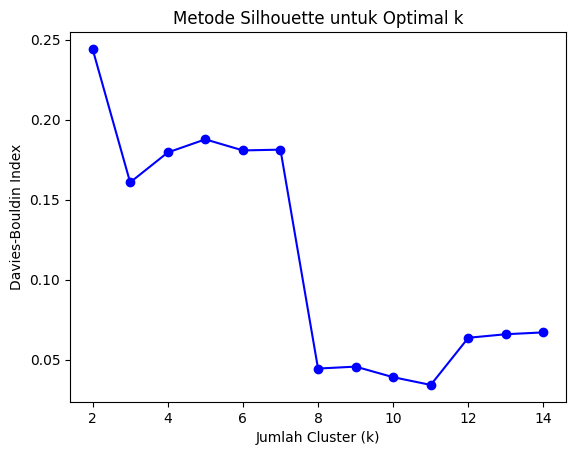

In [121]:
range_cluster = range(2, 15)
sill_scoress = []

for k in range_cluster:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_dm)
    score = silhouette_score(scaled_dm, cluster_labels)
    sill_scoress.append(score)
    print(f"k = {k}, Davies-Bouldin Index Score = {score:.4f}")

# Plot hasil

plt.plot(range_cluster, sill_scoress, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Metode Silhouette untuk Optimal k')
plt.show()

In [122]:
kmeanss = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
mut_cluster = kmeanss.fit_predict(scaled_dm)

In [123]:
mut_cluster

array([4, 4, 4, ..., 4, 4, 4])

In [124]:
df['Mutation Cluster'] = mut_cluster

In [125]:
df['Mutation Cluster'].unique()

array([4, 5, 2, 1, 3, 6, 0])

# Tambah Kolom

In [128]:
df['Total Mutation'] = gene_mut.sum(axis=1)

df['Total Mutation'].unique()

array([ 0,  2,  1,  4,  3,  5,  7,  8,  6, 11, 13, 10,  9, 18, 16, 12, 20,
       22, 15, 14, 23, 17, 19, 32, 38, 48], dtype=int64)

In [129]:
# save data

new_df = df[['patient_id',
            'age_at_diagnosis',
            'type_of_breast_surgery',
            'cancer_type',
            'cancer_type_detailed',
            'cellularity',
            'chemotherapy',
            'pam50_+_claudin-low_subtype',
            'cohort',
            'er_status_measured_by_ihc',
            'er_status',
            'neoplasm_histologic_grade',
            'her2_status_measured_by_snp6',
            'her2_status',
            'tumor_other_histologic_subtype',
            'hormone_therapy',
            'inferred_menopausal_state',
            'integrative_cluster',
            'primary_tumor_laterality',
            'lymph_nodes_examined_positive',
            'mutation_count',
            'nottingham_prognostic_index',
            'oncotree_code',
            'overall_survival_months',
            'overall_survival',
            'pr_status',
            'radio_therapy',
            '3-gene_classifier_subtype',
            'tumor_size',
            'tumor_stage',
            'death_from_cancer',
            'Total Mutation',
            'Mutation Cluster',
            'Gene Clustered']]

In [130]:
new_df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,Total Mutation,Mutation Cluster,Gene Clustered
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,1,Negative,1,ER-/HER2-,22.0,2.0,Living,0,4,2
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living,2,4,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,Positive,0,NaN,15.0,2.0,Died of Disease,2,4,2
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,1,Positive,1,NaN,25.0,2.0,Living,1,4,2
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,2,4,0


In [131]:
new_df.to_csv('Data_Project_Modsur3_ProcessedGene.csv')

# Preprocessing Data

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("F:\\Coding\\R\\Model_Survival\\Data_Project_Modsur3_ProcessedGene.csv")

df.head()

,Unnamed: 0,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,...,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,Total Mutation,Mutation Cluster,Gene Clustered
0,0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,...,1,Negative,1,ER-/HER2-,22.0,2.0,Living,0,4,2
1,1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,...,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living,2,4,0
2,2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,...,0,Positive,0,NaN,15.0,2.0,Died of Disease,2,4,2
3,3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,...,1,Positive,1,NaN,25.0,2.0,Living,1,4,2
4,4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,...,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,2,4,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1904 non-null   int64  
 1   patient_id                      1904 non-null   int64  
 2   age_at_diagnosis                1904 non-null   float64
 3   type_of_breast_surgery          1882 non-null   object 
 4   cancer_type                     1904 non-null   object 
 5   cancer_type_detailed            1889 non-null   object 
 6   cellularity                     1850 non-null   object 
 7   chemotherapy                    1904 non-null   int64  
 8   pam50_+_claudin-low_subtype     1904 non-null   object 
 9   cohort                          1904 non-null   float64
 10  er_status_measured_by_ihc       1874 non-null   object 
 11  er_status                       1904 non-null   object 
 12  neoplasm_histologic_grade       18

Ada observasi yang hilang dari masing-masing kolom.

In [6]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Unnamed: 0                         0.000000
patient_id                         0.000000
age_at_diagnosis                   0.000000
type_of_breast_surgery             1.155462
cancer_type                        0.000000
cancer_type_detailed               0.787815
cellularity                        2.836134
chemotherapy                       0.000000
pam50_+_claudin-low_subtype        0.000000
cohort                             0.000000
er_status_measured_by_ihc          1.575630
er_status                          0.000000
neoplasm_histologic_grade          3.781513
her2_status_measured_by_snp6       0.000000
her2_status                        0.000000
tumor_other_histologic_subtype     0.787815
hormone_therapy                    0.000000
inferred_menopausal_state          0.000000
integrative_cluster                0.000000
primary_tumor_laterality           5.567227
lymph_nodes_examined_positive      0.000000
mutation_count                     2.363445
nottingham_prognostic_index     

In [7]:
df.columns

Index(['Unnamed: 0', 'patient_id', 'age_at_diagnosis',
       'type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed',
       'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort',
       'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer', 'Total Mutation',
       'Mutation Cluster', 'Gene Clustered'],
      dtype='object')

In [8]:
df = df.drop(columns=['Unnamed: 0', 'patient_id'])

In [9]:
df.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,Total Mutation,Mutation Cluster,Gene Clustered
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,...,1,Negative,1,ER-/HER2-,22.0,2.0,Living,0,4,2
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,...,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living,2,4,0
2,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,Positive,0,NaN,15.0,2.0,Died of Disease,2,4,2
3,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,...,1,Positive,1,NaN,25.0,2.0,Living,1,4,2
4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,...,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,2,4,0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

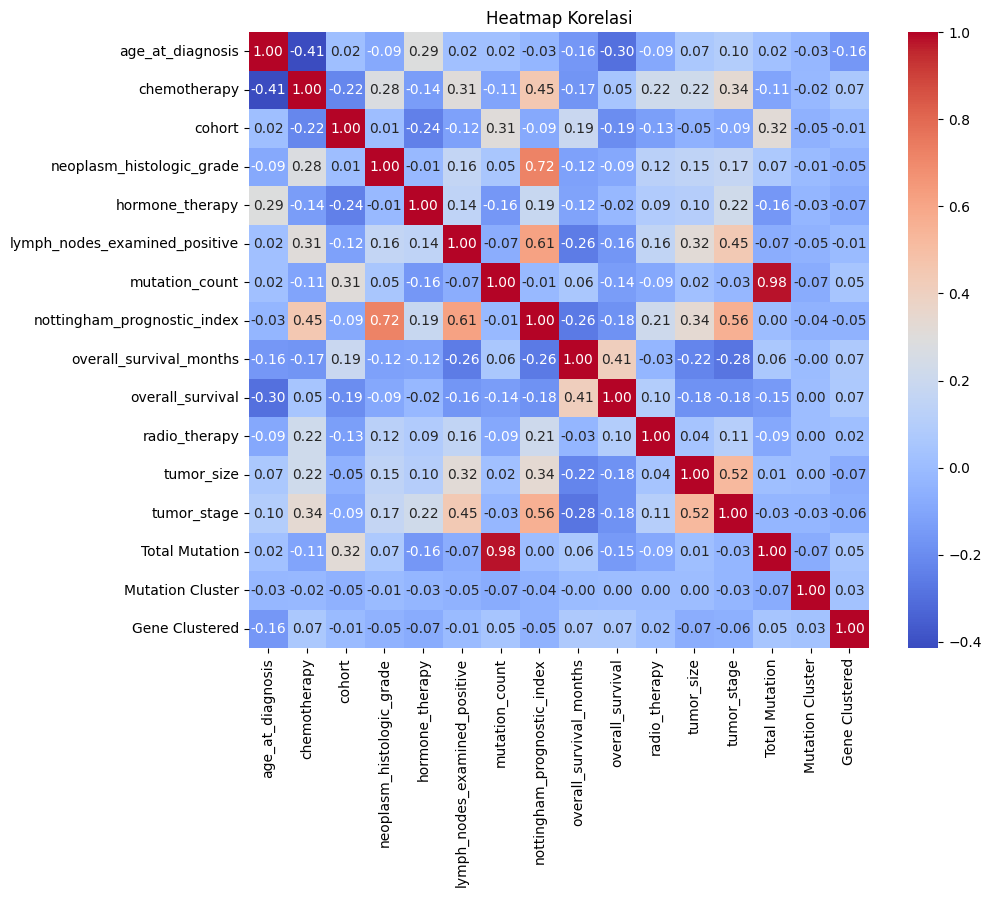

In [22]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric_clean = df_numeric.dropna()

correlation_matrix = df_numeric_clean.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt = ".2f")

plt.title("Heatmap Korelasi")
plt.show()

In [11]:
from scipy.stats import chi2_contingency

In [12]:
def cramers_v(contingency_table):
    """ Menghitung Cramér's V untuk tabel kontingensi """
    # Menghindari error jika tabel kosong atau invalid
    if contingency_table.empty or 0 in contingency_table.shape:
        return 0
    
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    
    # Menghindari pembagian dengan nol
    if n == 0:
        return 0
        
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    # Menghindari pembagian dengan nol
    if min((k_corr-1), (r_corr-1)) <= 0:
        return 0
        
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

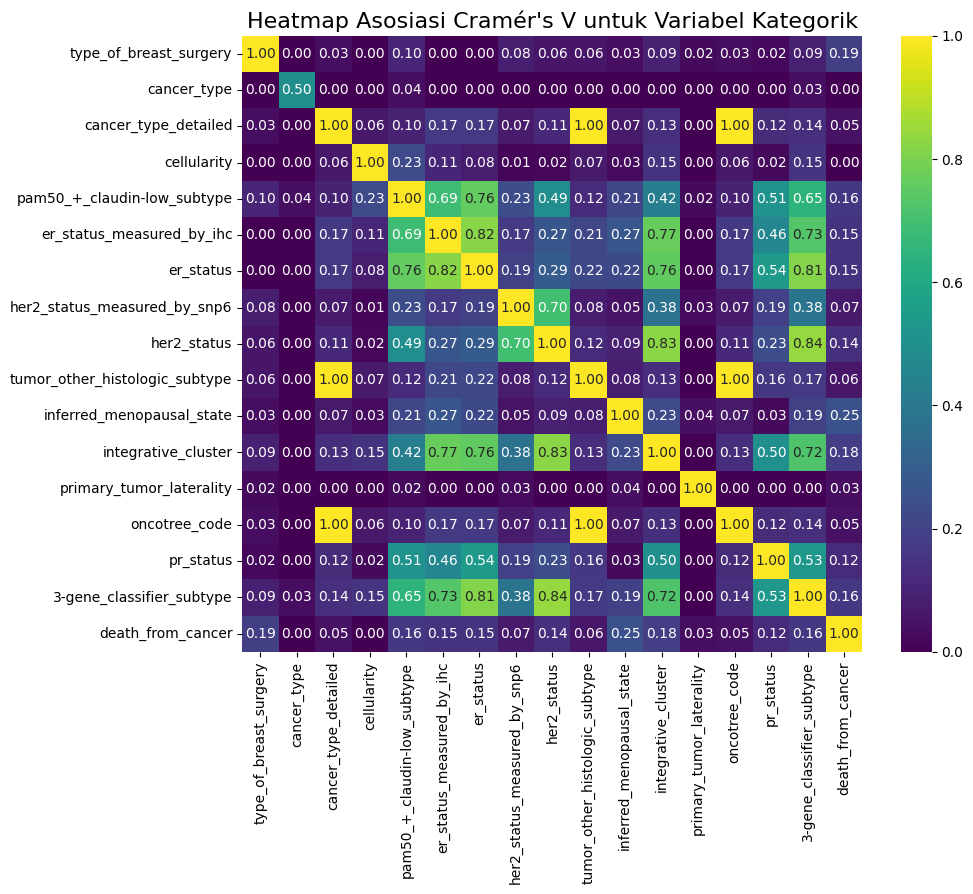

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols_cleaned = categorical_cols.dropna()

cramer_matrix = pd.DataFrame(np.zeros((len(categorical_cols_cleaned),len(categorical_cols_cleaned))),
                             index=categorical_cols_cleaned, columns=categorical_cols_cleaned)

for col1 in categorical_cols_cleaned:
    for col2 in categorical_cols_cleaned:
        # Tidak perlu menghitung ulang jika sudah diisi (matriks simetris)
        if cramer_matrix.loc[col1, col2] == 0:
            contingency = pd.crosstab(df[col1], df[col2])
            v = cramers_v(contingency)
            cramer_matrix.loc[col1, col2] = v
            cramer_matrix.loc[col2, col1] = v


# 6. Memvisualisasikan matriks dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title("Heatmap Asosiasi Cramér's V untuk Variabel Kategorik", fontsize=16)
plt.show()

In [ ]:
# categorical_cols dan df_numeric
print(f"Kolom Kategorik: {list(categorical_cols_cleaned)}")
print(f"Kolom Numerik: {list(df_numeric_clean)}")
print("-" * 50)

In [ ]:
'''
Run this cell, i dare you not.

Cell ini untuk mengecek hubungan yang ada antara dua variabel kategorik
dan numerik menggunakan box-plot. 

Catatan:    Tidak ada informasi yang berharga, setiap output memberikan hubungan
            yang lemah antar dua variabel...
'''

if not categorical_cols_cleaned.empty and not df_numeric_clean.empty:
    print("Membuat visualisasi untuk setiap pasangan...")
    
    for cat_col in categorical_cols_cleaned:
        for num_col in df_numeric_clean:
            
            plt.figure(figsize=(10, 6))
            
            # --- BARIS YANG DIPERBAIKI ---
            sns.boxplot(
                x=cat_col, 
                y=num_col, 
                data=df, 
                hue=cat_col,        # Tetapkan hue ke variabel x
                palette="Set3",     # Terapkan palet warna
                legend=False        # Sembunyikan legenda
            )
            # ---------------------------
            
            plt.title(f'Hubungan antara "{cat_col}" dan "{num_col}"', fontsize=16, pad=15)
            plt.xlabel(cat_col, fontsize=12)
            plt.ylabel(num_col, fontsize=12)
            plt.xticks(rotation=15)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            
            plt.tight_layout()
            plt.show()
            
else:
    print("Tidak ditemukan kombinasi kolom kategorik dan numerik untuk dianalisis.")

In [15]:
# persiapan imputasi

df_imputed = df.copy()

### Imputasi fitur type_of_breast_surgery

In [16]:
df['type_of_breast_surgery'].unique()

array(['MASTECTOMY', 'BREAST CONSERVING', nan], dtype=object)

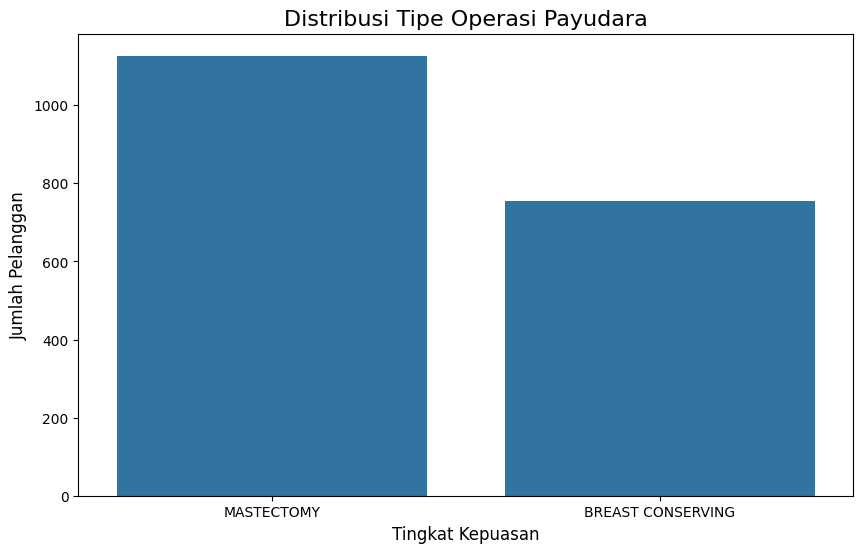

In [17]:
# buat bar plot

plt.figure(figsize=(10, 6))
sns.countplot(x='type_of_breast_surgery', data = df)
plt.title('Distribusi Tipe Operasi Payudara', fontsize=16)
plt.xlabel('Tingkat Kepuasan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

plt.show()

In [18]:

group_mode_map = df.groupby(['pam50_+_claudin-low_subtype',
                             'her2_status_measured_by_snp6',
                             'integrative_cluster'])['type_of_breast_surgery']\
                   .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)\
                   .to_dict()

def fill_surgery(row):
    if pd.isna(row['type_of_breast_surgery']):
        key = (row['pam50_+_claudin-low_subtype'],
               row['her2_status_measured_by_snp6'],
               row['integrative_cluster'])
        return group_mode_map.get(key, 'MASTECTOMY')  # fallback value
    else:
        return row['type_of_breast_surgery']

df_imputed['type_of_breast_surgery'] = df_imputed.apply(fill_surgery, axis=1)


In [19]:
df_imputed['type_of_breast_surgery'].unique()

array(['MASTECTOMY', 'BREAST CONSERVING'], dtype=object)

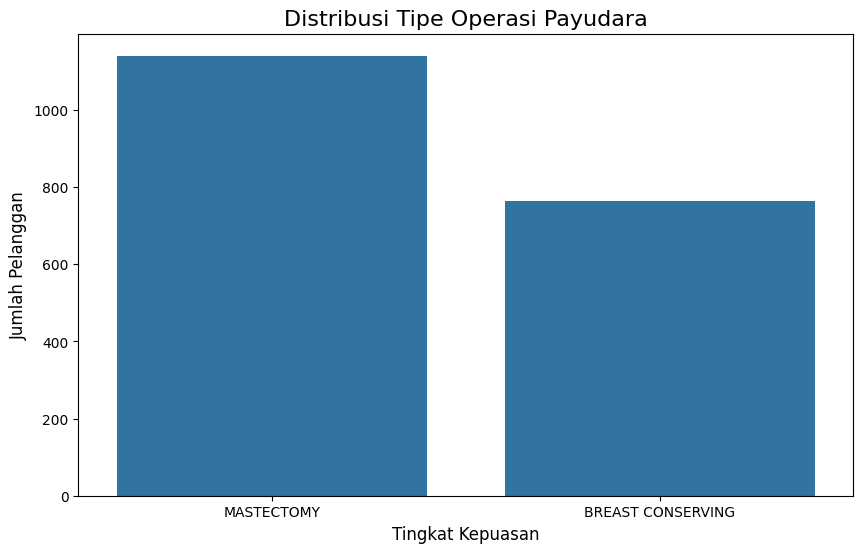

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type_of_breast_surgery', data = df_imputed)
plt.title('Distribusi Tipe Operasi Payudara', fontsize=16)
plt.xlabel('Tingkat Kepuasan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

plt.show()

### Imputasi fitur cancer_type_detailed

In [20]:
df['cancer_type_detailed'].unique()

array(['Breast Invasive Ductal Carcinoma',
       'Breast Mixed Ductal and Lobular Carcinoma',
       'Breast Invasive Lobular Carcinoma',
       'Breast Invasive Mixed Mucinous Carcinoma', 'Breast', nan,
       'Metaplastic Breast Cancer'], dtype=object)

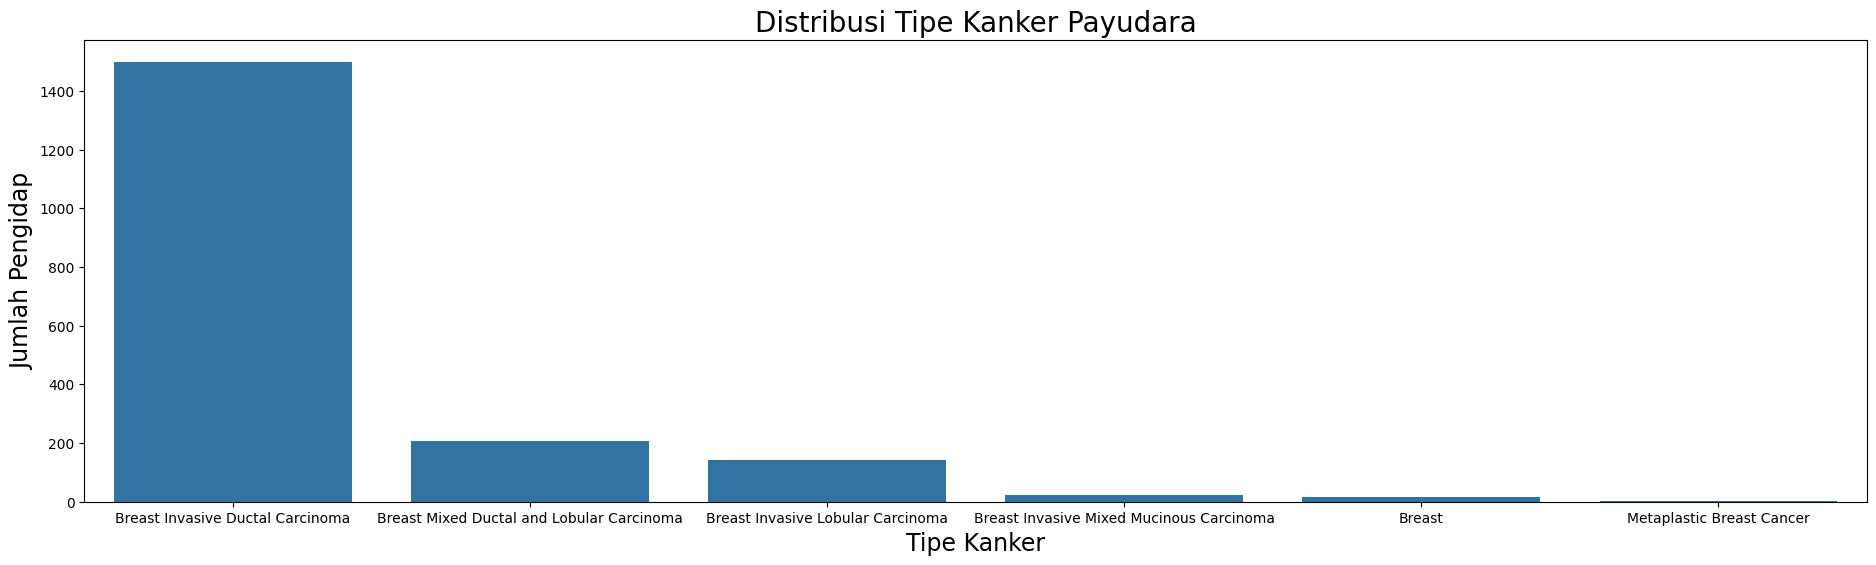

In [49]:
# buat bar plot

plt.figure(figsize=(23, 6))
sns.countplot(x='cancer_type_detailed', data = df)
plt.title('Distribusi Tipe Kanker Payudara', fontsize=20)
plt.xlabel('Tipe Kanker', fontsize=17)
plt.ylabel('Jumlah Pengidap', fontsize=17)

plt.show()

Kalo ini imputasi modus aman. Tapi, berdasarkan hubungan antar variabel ini kuat dengan variabel *tumor_other_histologic_subtype* dan *oncotree_code*. Jadi pake berdasarkan grup dari dua variabel tersebut.

In [ ]:
df_imputed2 = df_imputed.copy()

In [23]:
group_mode_map = df_imputed.groupby(['tumor_other_histologic_subtype',
                                     'oncotree_code',
                                     ])['cancer_type_detailed']\
                   .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)\
                   .to_dict()

def fill_surgery(row):
    if pd.isna(row['cancer_type_detailed']):
        key = (row['tumor_other_histologic_subtype'],
               row['oncotree_code'])
        return group_mode_map.get(key, 'Breast Invasive Ductal Carcinoma')  # fallback value
    else:
        return row['cancer_type_detailed']

df_imputed2['cancer_type_detailed'] = df_imputed2.apply(fill_surgery, axis=1)

In [28]:
df_imputed2['cancer_type_detailed'].unique()

array(['Breast Invasive Ductal Carcinoma',
       'Breast Mixed Ductal and Lobular Carcinoma',
       'Breast Invasive Lobular Carcinoma',
       'Breast Invasive Mixed Mucinous Carcinoma', 'Breast',
       'Metaplastic Breast Cancer'], dtype=object)

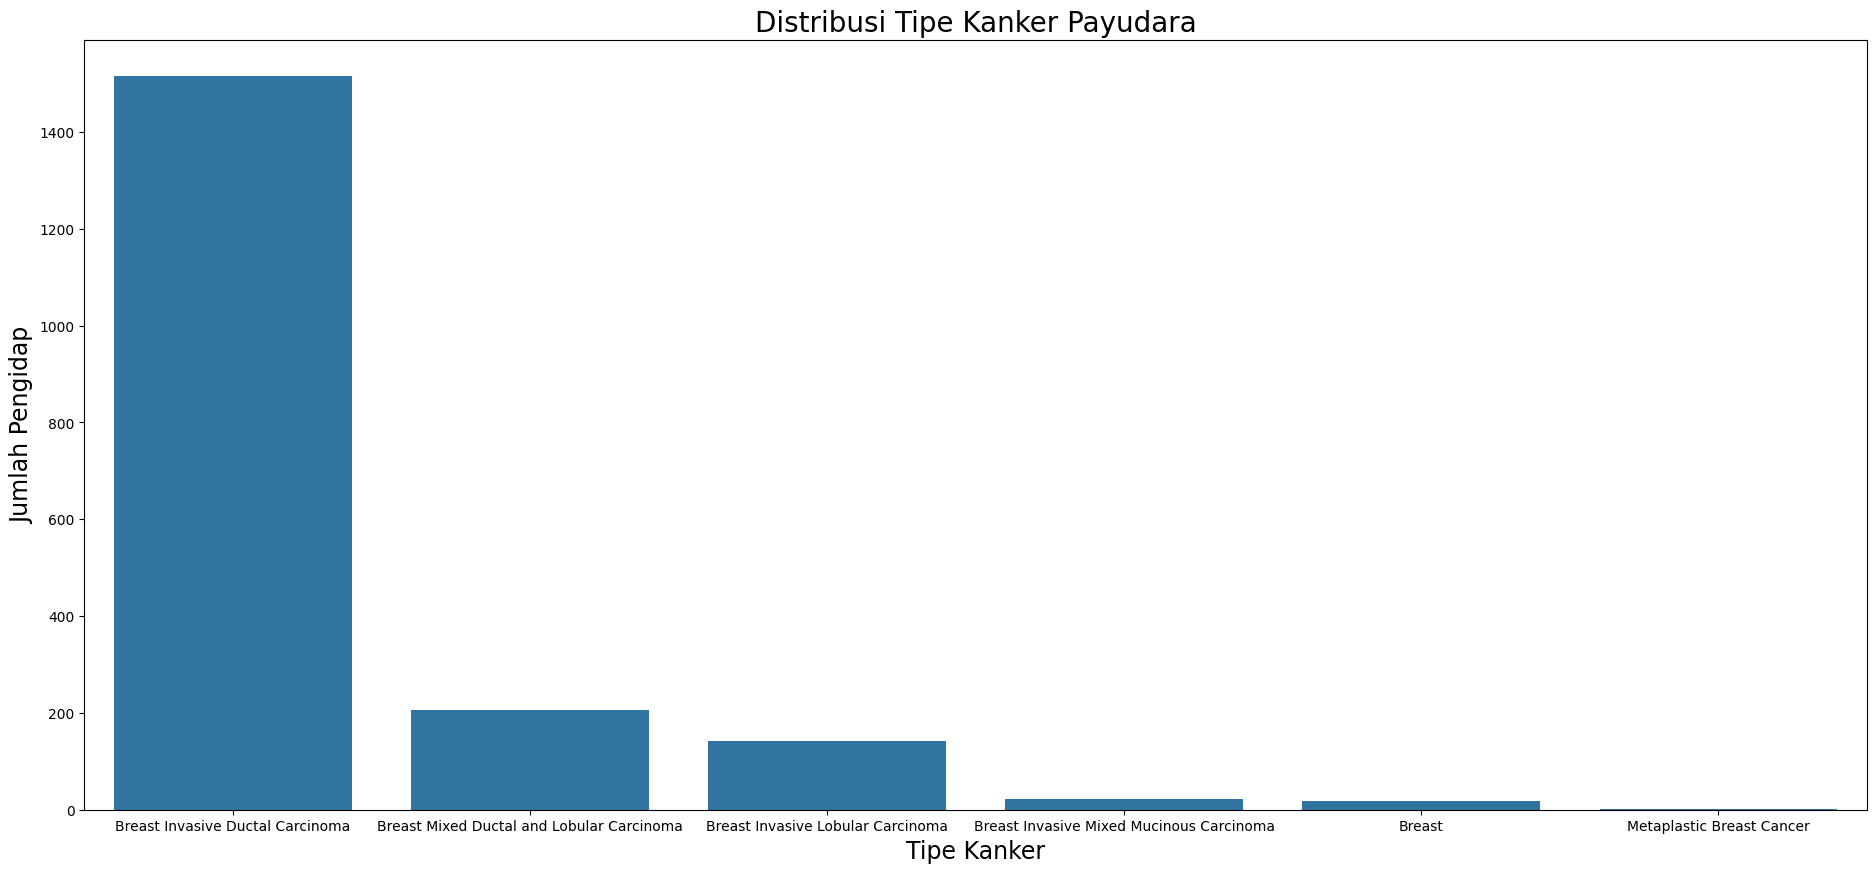

In [32]:
plt.figure(figsize=(23, 10))
sns.countplot(x='cancer_type_detailed', data = df_imputed2)
plt.title('Distribusi Tipe Kanker Payudara', fontsize=20)
plt.xlabel('Tipe Kanker', fontsize=17)
plt.ylabel('Jumlah Pengidap', fontsize=17)

plt.show()

In [29]:
df_imputed2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                1904 non-null   float64
 1   type_of_breast_surgery          1904 non-null   object 
 2   cancer_type                     1904 non-null   object 
 3   cancer_type_detailed            1904 non-null   object 
 4   cellularity                     1850 non-null   object 
 5   chemotherapy                    1904 non-null   int64  
 6   pam50_+_claudin-low_subtype     1904 non-null   object 
 7   cohort                          1904 non-null   float64
 8   er_status_measured_by_ihc       1874 non-null   object 
 9   er_status                       1904 non-null   object 
 10  neoplasm_histologic_grade       1832 non-null   float64
 11  her2_status_measured_by_snp6    1904 non-null   object 
 12  her2_status                     19

### Imputasi fitur cellularity

In [35]:
df_imputed['cellularity'].unique()

array([nan, 'High', 'Moderate', 'Low'], dtype=object)

In [40]:
print(df_imputed2['cellularity'].value_counts())

cellularity
High        939
Moderate    711
Low         200
Name: count, dtype: int64


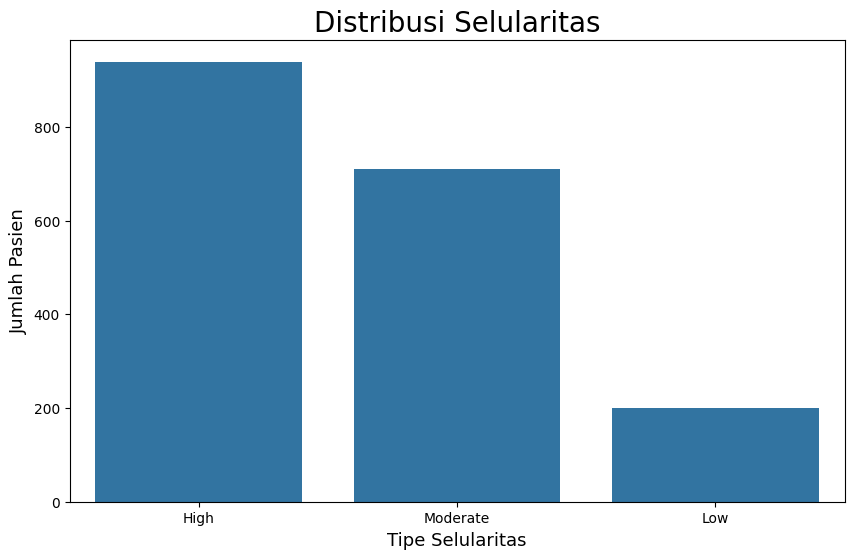

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cellularity', data = df)
plt.title('Distribusi Selularitas', fontsize=20)
plt.xlabel('Tipe Selularitas', fontsize=13)
plt.ylabel('Jumlah Pasien', fontsize=13)

plt.show()

In [34]:
df_imputed = df_imputed2.copy()

In [36]:
group_mode_map = df_imputed2.groupby(['chemotherapy',
                                     'hormone_therapy',
                                     'radio_therapy',
                                     'tumor_stage',
                                     'Mutation Cluster',
                                     'Total Mutation'
                                     ])['cellularity']\
                   .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)\
                   .to_dict()

def fill_surgery(row):
    if pd.isna(row['cellularity']):
        key = (row['chemotherapy'],
               row['hormone_therapy'],
               row['radio_therapy'],
               row['tumor_stage'],
               row['Mutation Cluster'],
               row['Total Mutation'])
        return group_mode_map.get(key, 'High')  # fallback value
    else:
        return row['cellularity']

df_imputed['cellularity'] = df_imputed.apply(fill_surgery, axis=1)

In [41]:
print(df_imputed['cellularity'].value_counts())

cellularity
High        975
Moderate    722
Low         201
Name: count, dtype: int64


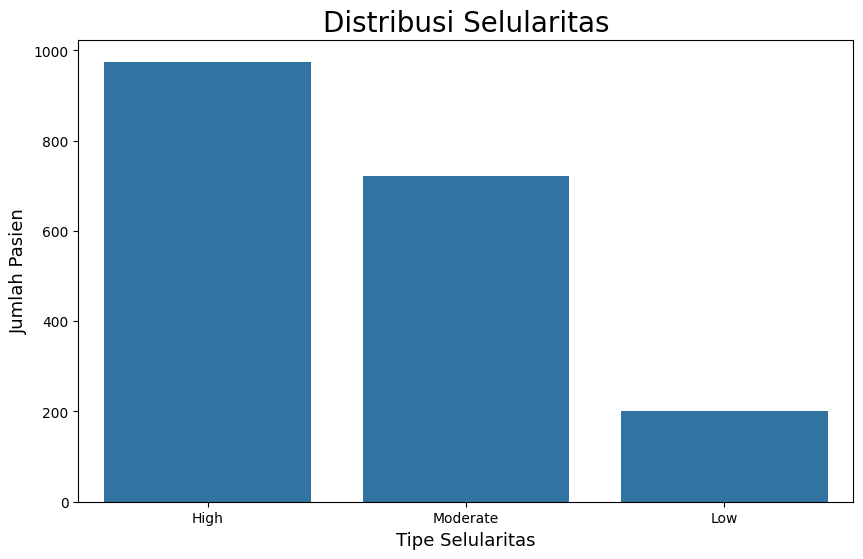

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cellularity', data = df_imputed)
plt.title('Distribusi Selularitas', fontsize=20)
plt.xlabel('Tipe Selularitas', fontsize=13)
plt.ylabel('Jumlah Pasien', fontsize=13)

plt.show()